# EE 379K Lab 4

## Rohan Nagar and Wenyang Fu

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Problem 1: Linear Algebra in Python

## Part 1

Consider the lienar subspace $S = span\{v_1, v_2, v_3, v_4\}$ where $v_1 = [1, 2, 3, 4]$, $v_2 = [0, 1, 0, 1]$, $v_3 = [1, 4, 3, 6]$, $v_4 = [2, 11, 6, 15]$. Create a vector inside $S$ different from $v_1, v_2, v_3, v_4$. Create a vector not in $S$. How would you check if a new vector is in $S$?

In [3]:
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])

# TODO

## Part 2

Find the dimension of the subspace $S$.

## Part 3

Find an orthonormal basis for the subspace S.

## Part 4

Solve the optimization problem $min_{x \in S}\| x - z^* \|_2$ where $z^* = [1, 0, 0, 0]$

# Problem 2: PCA

## Part 1



/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


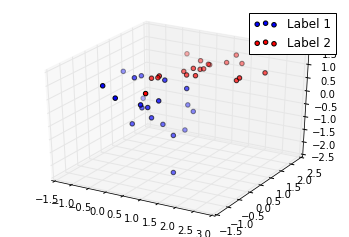

In [4]:
mean1 = [0, 0, 0]
cov1 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.7]]

mean2 = [1, 1, 1]
cov2 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.01]]

# Generate the samples
label1_samples = np.random.multivariate_normal(mean1, cov1, 20)
label2_samples = np.random.multivariate_normal(mean2, cov2, 20)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label1_samples.T[0], label1_samples.T[1], label1_samples.T[2], label='Label 1')
ax.scatter(label2_samples.T[0], label2_samples.T[1], label2_samples.T[2], c='r', label='Label 2')
ax.legend()
fig.show()

## Part 2

What do the points look like?

#### The label 1 points are labled in blue above. These points are more spread out and they go much lower in the $z$ direction than the label 2 points. It is also generally lower in value in the $x$ direction than the label 2 points. The label 2 points are more compact and closer together. They form more of an ellipsoid shape than the label 1 points.

## Part 3

In [25]:
def covariance(X, Y):
    ''' 
    Finds the covariance of the two arrays X and Y.
    X and Y must be the same length.
    '''
    if len(X) is not len(Y):
        return None
    
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    
    total = 0
    for x, y in zip(X, Y):
        total += (x-X_mean)*(y-Y_mean)
        
    return total / (len(X) - 1)

# Concatenate
samples = label1_samples + label2_samples

# Calculate the covariance matrix
cov = [[covariance(col, col2) for col2 in samples.T] for col in samples.T]
print(np.array(cov))

[[ 0.63808889 -0.01621884 -0.24727913]
 [-0.01621884  1.34435653 -0.22731382]
 [-0.24727913 -0.22731382  0.69991861]]


## Part 4

In [64]:
def largest_eigenvectors(cov):
    values, vectors = np.linalg.eig(cov)
    
    largest = max(values)
    second_largest = max(np.delete(values, np.nonzero(values==largest)[0][0]))

    first_vector = vectors[:,np.nonzero(values==largest)[0][0]]
    second_vector = vectors[:,np.nonzero(values==second_largest)[0][0]]
    
    return first_vector, second_vector
    
eigenvectors = largest_eigenvectors(cov)

# TODO: project label1_samples and label2_samples onto the two eigenvectors and plot with labels

(array([-0.08317887, -0.94195361,  0.32527629]),
 array([-0.70782157,  0.28560813,  0.64607787]))

Did PCA make it easier to distingush the two labels in two dimensions?

#### TODO: Answer here.

# Problem 3: Low Rank Approximation

## Part 1

Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a SVD on this matrix using $\tt{linalg.svd}$. You can perform a low-rank approximation by zeroing out singular values and keeping only the top $k$. Show the best rank for $k = 2$, $k = 5$, and $k = 10$ approximation to Mona Lisa.

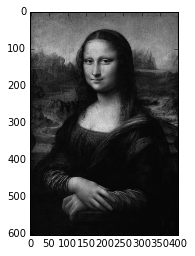

In [14]:
M = mpimg.imread('mona_lisa.png')
plt.imshow(M)

In [17]:
svd = np.linalg.svd(M)

# TODO: low-rank approxmiation

## Part 2

If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa for each of those $k$ rank approximations?

# Problem 4: Kaggle

## Part 1

Make an account on Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

# Part 2

Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using $\alpha = 0.1$. Make a submission of this prediciton, what is the RSME you get? (Hint: remember to exponentiate $\tt{np.expm1(ypred)}$ your predicitons).

## Part 3

Try to build the best model you can. Report the best RSME you got on the Kaggle wall and how you got it.